In [1]:
%matplotlib inline

# Closest Planet -- Numerical Solution

## 来数值解“最近行星”问题吧～

## Reviewing the question 
## 回顾下目前进展：
We already know that we can simplify the question into an integral that involves the orbit radius of the neighbor planets. 

The simplified picture and variables are shown in this figure:


<img src="./planet_orbits3.png" alt="orbits"
	title="Simplified Orbit model" width="250" height="130" 
    style="background-color:black;" />
    
简化后的物理图像和变量标注如上图

The average distance between the two planets can be obtained by:
$$ \begin{align*}
    \bar{d} =& \frac{\int_0^{2 \pi} d(\theta) d \theta}{\int_0^{2 \pi} d \theta} \\
                =& \frac{1}{2\pi} \int^{2 \pi}_0
                        \sqrt{
                        R_1^2 +R_2^2 -2 R_1 R_2 \sin{\theta}
                        }~ d\theta
   \end{align*}
$$

我们可以用以上这个积分来计算两恒星的平均距离。

因为其中一者为地球，我们可以取$R_1 = 1$ A.U.(一个天文单位），具体我们带入数值来算：

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def avg_d(r2):
    dtheta = 0.0001
    theta_s = np.arange(0, 2*np.pi, dtheta)
    d_theta = np.sqrt(1.0 + r2**2 + 2* r2 *np.sin(theta_s))
    d_avg = dtheta/2.0/np.pi * np.sum(d_theta) 
    
    return d_avg

### Testing the code
测试： 取 $R2=0$，结果显然应当为 1 A.U.

In [3]:
print(avg_d(0.0))

1.0000023384349968


##### Dependence on the orbit radius of the neighbor

接下来我们测试去不同的 $R_2$，得到平均距离是怎么样的。
我们来测试 0 -- 5 A.U. 内的情况

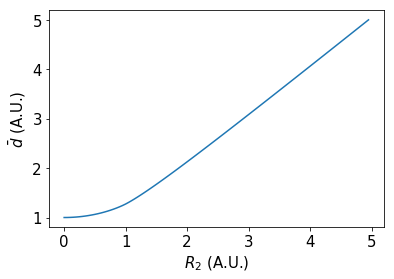

In [4]:
## Calculate the results within the test range
x_r2 = np.arange(0.0, 5.0, 0.05)
y_davg =[]
for x_i in x_r2:
    y_i = avg_d(x_i)
    y_davg.append(y_i)

## plot the result
font = {'size': 15}
matplotlib.rc('font', **font)
plt.plot(x_r2, y_davg)
plt.xlabel(r'$R_2$ (A.U.)')
plt.ylabel(r'$\bar{d}$ (A.U.)')
plt.show()

我们可以清楚地看到，当第二颗行星的公转半径超过地球时，和地球的平均距离几乎就是在线性增长了。

这也比较好理解，越过地球轨道后，无论两者在太阳的同一侧还是在互相的对面，最小距离和最大距离都在随着其公转半径增大而变大。

有意思的是公转半径比较小的范围，我们再放大研究下 0 -- 1.2 A.U. 范围内的情况

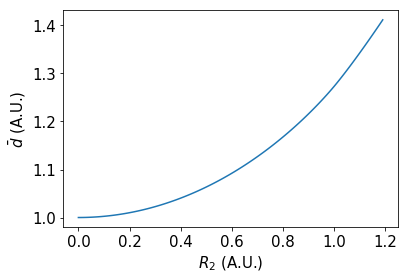

In [5]:
## Calculate the results within the test range
x_r2 = np.arange(0.0, 1.2, 0.01)
y_davg =[]
for x_i in x_r2:
    y_i = avg_d(x_i)
    y_davg.append(y_i)

## plot the result
font = {'size': 15}
matplotlib.rc('font', **font)
plt.plot(x_r2, y_davg)
plt.xlabel(r'$R_2$ (A.U.)')
plt.ylabel(r'$\bar{d}$ (A.U.)')
plt.show()

这样我们就可以完全确认了，在比较小的公转半径范围内，和地球的平均距离依然和公转半径是单调递增关系。

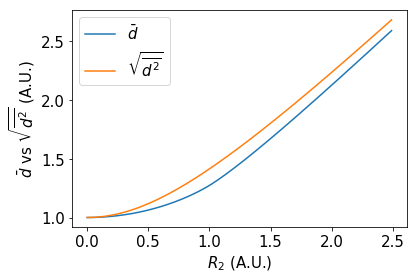

In [6]:
## compare with the result of averaging over d^2

x_r2 = np.arange(0.0, 2.5, 0.01)
y_davg =[]
for x_i in x_r2:
    y_i = avg_d(x_i)
    y_davg.append(y_i)

plt.plot(x_r2, y_davg, label=r'$\bar{d}$')
plt.xlabel(r'$R_2$ (A.U.)')
plt.ylabel(r'$\bar{d}$ vs $\sqrt{\overline{d^2}}$ (A.U.)')

y_d2avg = np.sqrt(x_r2**2 +1)
plt.plot(x_r2, y_d2avg, label=r'$\sqrt{\overline{d^2}}$')
plt.legend()
plt.show()